In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

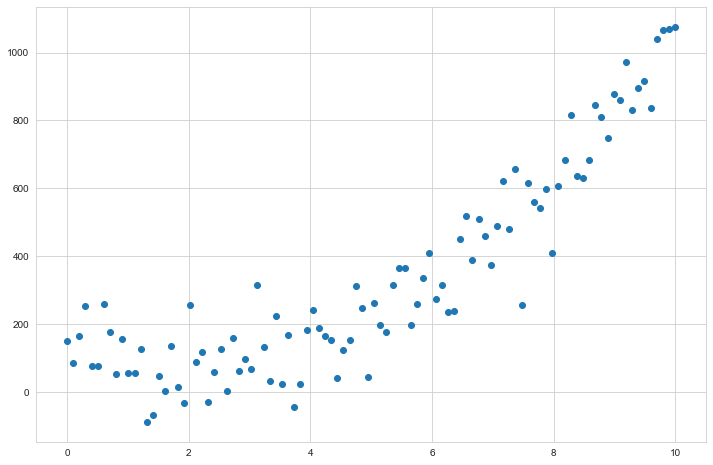

In [87]:
np.random.seed(42)
n_samples = 100
X = np.linspace(0,10,100) # between 0 to 10, subsetting 100 times

rng = np.random.randn(n_samples)*100 # multiplying by 100 just to increase the scale

y=X**3+rng+100

plt.figure(figsize=(12,8))
plt.scatter(X,y)

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

0.7643394574930141


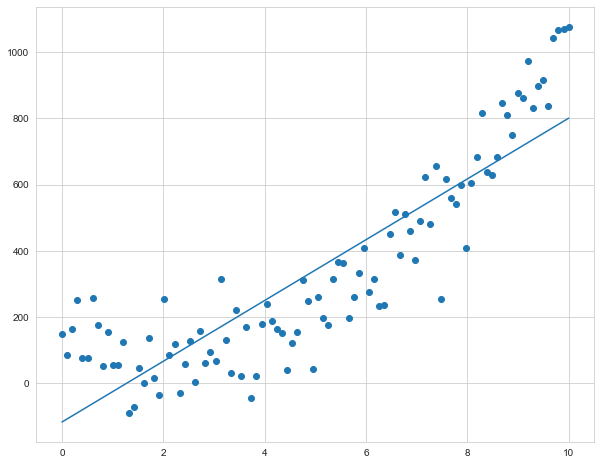

In [89]:
lr = LinearRegression()
lr.fit(X.reshape(-1,1),y)
model_predict = lr.predict(X.reshape(-1,1))

plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(X,model_predict)
# plt.plot(X,y)
print(r2_score(y,model_predict))

In [90]:
from sklearn.preprocessing import PolynomialFeatures

In [91]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X.reshape(-1,1))

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y.reshape(-1,1))
y_pred = lin_reg_2.predict(X_poly)


0.9173858308909386


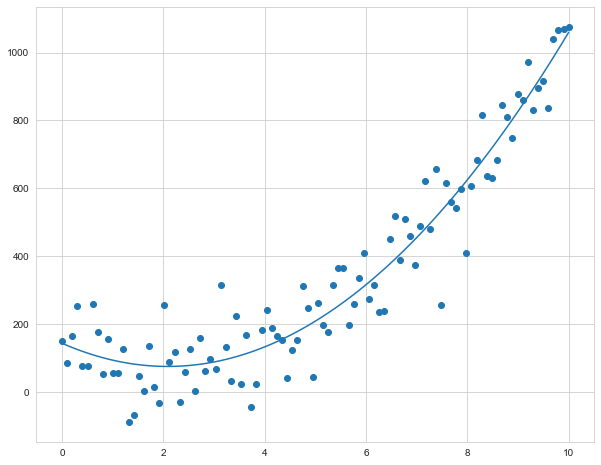

In [92]:
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(X,y_pred)
print(r2_score(y,y_pred))

In [93]:
example_arr = np.array([1,2,3,4,5])
example_arr

array([1, 2, 3, 4, 5])

In [94]:
preg_2 = PolynomialFeatures()
res_2 = preg_2.fit_transform(example_arr.reshape(-1,1))
res_2

array([[ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.]])

In [95]:
preg_3 = PolynomialFeatures(degree=3)
res_3 = preg_3.fit_transform(example_arr.reshape(-1,1))
res_3

array([[  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.]])

In [96]:
preg_4 = PolynomialFeatures(degree=4)
res_4 = preg_4.fit_transform(example_arr.reshape(-1,1))
res_4

array([[  1.,   1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.,  16.],
       [  1.,   3.,   9.,  27.,  81.],
       [  1.,   4.,  16.,  64., 256.],
       [  1.,   5.,  25., 125., 625.]])

## Non-Linear Relationships

In [97]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

In [98]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [99]:
y= boston_data.target
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

## Brief Intro to Descision Trees

In [100]:
from sklearn.tree import DecisionTreeRegressor

array([[1.73],
       [1.92],
       [1.98],
       [2.47],
       [2.87],
       [2.88],
       [2.94],
       [2.96],
       [2.97],
       [2.98]])

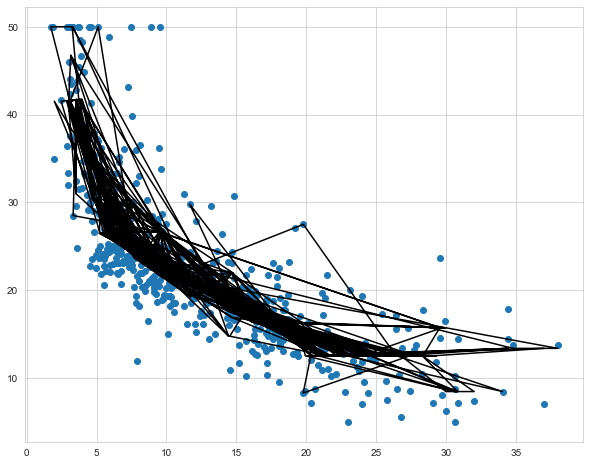

In [101]:
X=df[['LSTAT']].values
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X,y)

sort_idx = X.flatten().argsort()


# Plotting without X being sorted
plt.figure(figsize=(10,8))
plt.scatter(X.reshape(-1,1),y)
plt.plot(X,tree.predict(X.reshape(-1,1)),color='k')

# CHecking how flatten n arg sort works 
X[:10]
sort_idx_10 = sort_idx[:10] # these are sorted indices
X[sort_idx_10] # actual array with the sorted values

Text(0, 0.5, 'MEDV')

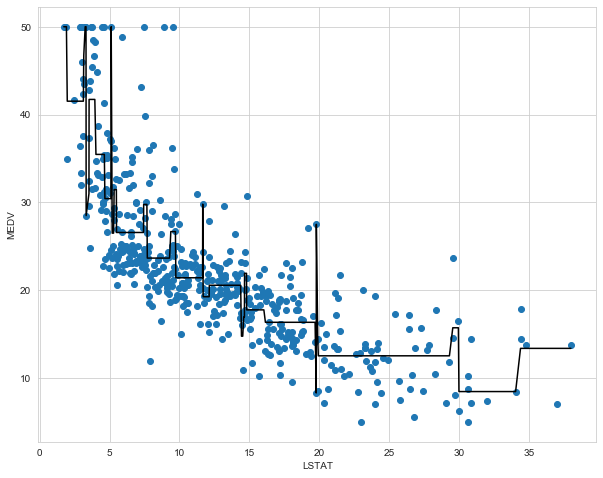

In [102]:
# Sort and arranged X values for better visualization and understanding
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx],y[sort_idx])
plt.plot(X[sort_idx],tree.predict(X[sort_idx]),color='k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV')

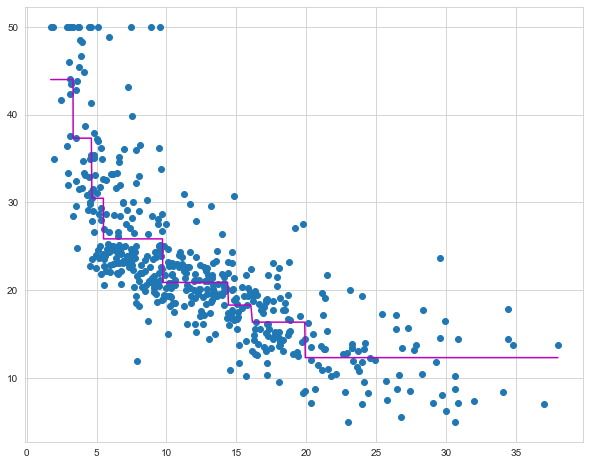

In [103]:
tree_lower_degree = DecisionTreeRegressor(max_depth=3)
tree_lower_degree.fit(X,y)

plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx],y[sort_idx])
#plt.plot(X[sort_idx],tree.predict(X[sort_idx]),color='k')
plt.plot(X[sort_idx],tree_lower_degree.predict(X[sort_idx]),color='m')

## Brief Introduction to Random Forest

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df.values
#y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators= 500, criterion='mse',random_state=42, n_jobs=-1)
forest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [105]:
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

In [106]:
print("MSE train : {0:.4f}, MSE test : {1:.4f}".format(mean_squared_error(y_train,y_train_pred), mean_squared_error(y_test,y_test_pred)) )

MSE train : 1.8700, MSE test : 9.3921


In [107]:
print("R2 score train : {0:.4f}, R2 score test : {1:.4f}".format(r2_score(y_train,y_train_pred), r2_score(y_test,y_test_pred)) )

R2 score train : 0.9787, R2 score test : 0.8740


## Brief intro to ADABOOST

In [108]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=500,random_state=42)

In [109]:
ada.fit(X_train,y_train)

y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

In [110]:
print("MSE train : {0:.4f}, MSE test : {1:.4f}".format(mean_squared_error(y_train,y_train_pred), mean_squared_error(y_test,y_test_pred)) )

MSE train : 4.6605, MSE test : 13.4949


In [111]:
print("R2 score train : {0:.4f}, R2 score test : {1:.4f}".format(r2_score(y_train,y_train_pred), r2_score(y_test,y_test_pred)) )

R2 score train : 0.9470, R2 score test : 0.8189


# FEATURE IMPORTANCE

In [112]:
ada.feature_importances_

array([0.03104826, 0.00243815, 0.01083651, 0.00085548, 0.0371141 ,
       0.23589575, 0.00958776, 0.13743614, 0.01893706, 0.02188852,
       0.04185043, 0.02193283, 0.43017901])

In [113]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [114]:
result=pd.DataFrame(ada.feature_importances_,df.columns)
result.columns =['feature']

result.sort_values(by='feature',ascending=False)

,feature
LSTAT,0.430179
RM,0.235896
DIS,0.137436
PTRATIO,0.041850
NOX,0.037114
CRIM,0.031048
B,0.021933
TAX,0.021889
RAD,0.018937
INDUS,0.010837


# DATA PREPROCESSING

In [115]:
X = df[['LSTAT']].values
y = boston_data.target
#X.shape

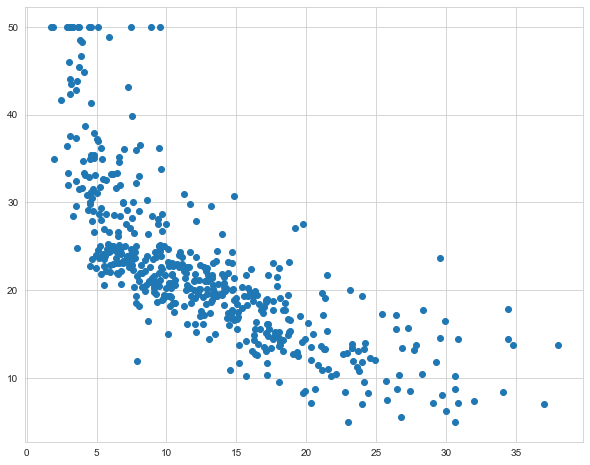

In [116]:
plt.figure(figsize=(10,8))
plt.scatter(X,y)

## Without PreProcessing

Text(0.5, 0, 'Epoch')

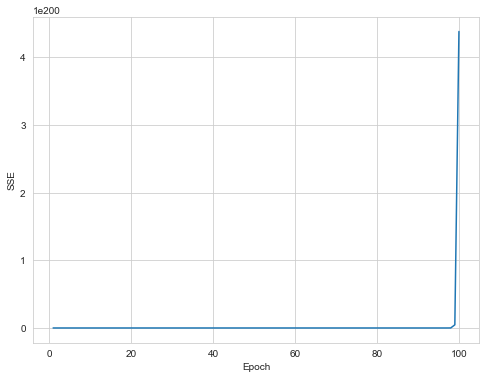

In [123]:
alpha = 0.0001
w_ = np.zeros(1+X.shape[1])
cost_ = []
n_ = 100

for i in range(n_):
    y_pred = np.dot(X,w_[1:])+w_[0]
    errors = (y-y_pred)
    w_[1:] += alpha * X.T.dot(errors)
    w_[0] += alpha * errors.sum()
    
    cost = (errors**2).sum()
    cost_.append(cost)
    
plt.figure(figsize=(8,6))
plt.plot(range(1,n_+1),cost_)
plt.ylabel("SSE")
plt.xlabel("Epoch")
    

In [122]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.reshape(-1,1)).flatten()
#X_std

Text(0.5, 0, 'Epoch')

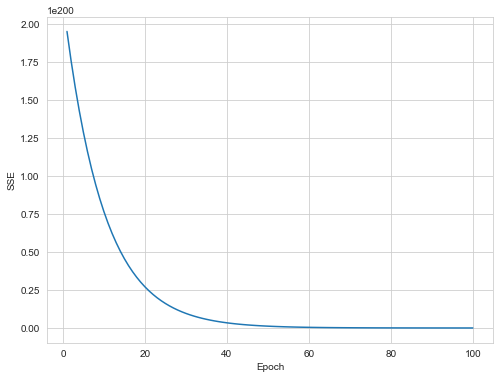

In [125]:
alpha = 0.0001
w = np.zeros(1+X_std.shape[1])
cost_=[]
n_ = 100

for i in range(n_):
    y_pred = np.dot(X_std,w_[1:])+w_[0]
    errors = (y_std-y_pred)
    
    w_[1:] += alpha*X_std.T.dot(errors)
    w_[0]+= alpha*errors.sum()
    
    cost = (errors**2).sum()
    cost_.append(cost)

plt.figure(figsize=(8,6))
plt.plot(range(1,n_+1), cost_)
plt.ylabel("SSE")
plt.xlabel("Epoch")


In [126]:
from sklearn import preprocessing

In [140]:
X_train = np.array([[1.,-1.,2.],
                    [2.,0.,0.],
                    [0.,1.,-1.]])
X_train.mean(axis=0)
X_train.mean(axis=1)
X_train

array([[ 1., -1.,  2.],
       [ 2.,  0.,  0.],
       [ 0.,  1., -1.]])

In [130]:
X_scaled = preprocessing.scale(X_train)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [132]:
X_scaled.mean(axis=0)
X_scaled.mean(axis = 1)

array([ 0.03718711,  0.31916121, -0.35634832])

In [133]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [136]:
scaler.mean_
scaler.scale_

array([0.81649658, 0.81649658, 1.24721913])

In [137]:
scaler.transform(X_train)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

([array([0., 0., 0., 1., 0., 0., 1., 0., 0., 1.]),
  array([1., 0., 0., 1., 0., 0., 1., 0., 0., 0.]),
  array([1., 0., 0., 1., 0., 0., 0., 0., 0., 1.])],
 array([-1. , -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  2. ]),
 <a list of 3 Lists of Patches objects>)

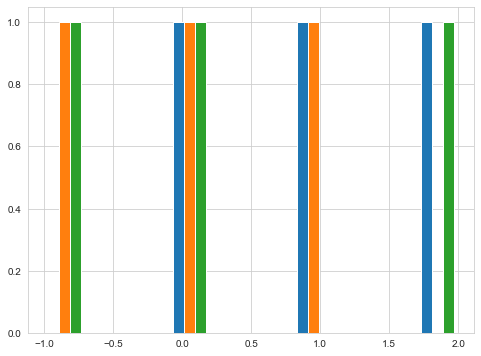

In [142]:
plt.figure(figsize=(8,6))
plt.hist(X_train)

In [143]:
X_test= [[-1.,1.,0.]]
scaler.transform(X_test)

array([[-2.44948974,  1.22474487, -0.26726124]])

## Min/Max

In [145]:
x_train = np.array([[1.,-1.,2.],
                    [2.,0.,0.],
                    [0.,1.,-1.]])
min_max_scaler = preprocessing.MinMaxScaler()
X_train_min_max = min_max_scaler.fit_transform(X_train)

In [146]:
X_train_min_max

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [153]:
X_test = np.array([[-3.,-1.,0.],[2.,1.5,4.]])
X_test_min_max = min_max_scaler.transform(X_test)
X_test_min_max

array([[0., 0., 0.],
       [1., 1., 1.]])